# Credit Risk Modelling
**Predict the probability of default, as well as generating a credit score**

The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations.

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals.

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default.

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We will then use these results to develop a credit rating.

Further we will explore the callibration and validation of the developed model to assess compliance with industry benchmarks and regulatory requirements.

We will eplore the following concepts in the notebook

Data cleaning - Structuring the data for modelling
What to do with missing values
How to deal with class imbalance and the implications.
How to choose the most appropriate modelling technique based on the reporting expectations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import imblearn

**Data Sourcing**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/raw-data.csv',low_memory=False)

In [ ]:
pd.options.display.max_columns = 100
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
5,6,0,2,28.0,3.0,1802.0,40800.0,30.0,4140.0,SC,0.0,13.00,FEMALE,SELF,RENT,03-04-1983,31.0,1,1,0,NaN,0,NaN,NaN,40800.0,NaN,NaN,0,0,0,TIER 1,0
6,7,0,1,26.0,2.0,2047.0,45900.0,30.0,2332.0,SC,0.0,13.50,MALE,SAL,RENT,05-10-1964,50.0,2,1,1,NaN,0,NaN,NaN,45900.0,NaN,26.0,1,0,0,TIER 1,0
7,8,0,0,24.0,0.0,2410.0,45900.0,24.0,4140.0,SC,0.0,13.00,MALE,SAL,OWNED,12-11-1976,38.0,1,1,0,NaN,0,NaN,NaN,45900.0,NaN,NaN,0,0,0,TIER 1,0
8,9,0,0,23.0,0.0,1255.0,23900.0,24.0,3712.0,MO,0.0,13.00,MALE,SELF,RENT,14-07-1988,26.0,2,1,1,NaN,0,NaN,NaN,23900.0,NaN,53.0,0,0,0,TIER 1,0
9,10,0,1,18.0,2.0,1748.0,25000.0,18.0,3409.0,MO,0.0,17.20,MALE,SELF,OWNED,11-01-1994,20.0,1,1,0,NaN,0,NaN,NaN,25000.0,NaN,NaN,0,0,0,TIER 1,0


Renaming the columns.

In [ ]:
data = data.rename(columns={'V1':'Customer ID',
                     'V2':'Customer has bounced in first emi',
                     'V3':'No of times bounced 12 months',
                     'V4':'Maximum mob',
                     'V5':'No of times bounced while repaying the loan',
                     'V6':'Emi',
                     'V7':'Loan amount',
                     'V8':'Tenure',
                     'V9':'Dealer codes from where customer has purchased the Two wheeler',
                     'V10':'Product code of Two wheeler','V11': 'No of advance EMI paid',
                     'V12': 'Rate of interest',
                     'V13': 'Gender',
                     'V14': 'Employment type',
                     'V15': 'Resident type of customer',
                     'V16': 'Date of birth',
                     'V17': 'Customer age when loan was taken',
                     'V18': 'No of loans',
                     'V19': 'No of secured loans',
                     'V20': 'No of unsecured loans',
                     'V21': 'Max amount sanctioned in the Live loans',
                     'V22': 'No of new loans in last 3 months',
                     'V23': 'Total sanctioned amount in the secured Loans which are Live',
                     'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
                     'V25': 'Maximum amount sanctioned for any Two wheeler loan',
                     'V26': 'Time since last Personal loan taken (in months)',
                     'V27': 'Time since first consumer durables loan taken (in months)',
                     'V28': 'No of times 30 days past due in last 6 months',
                     'V29': 'No of times 60 days past due in last 6 months',
                     'V30': 'No of times 90 days past due in last 3 months',
                     'V31': 'Tier',
                     'V32': 'Target variable'})

In [ ]:
data.head()

,Customer ID,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# Basic EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first emi                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum mob                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   Emi                                                             85048 non-null   float64
 6   Loan amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
data.shape

(119528, 32)

Checking for duplicate entries.

In [ ]:
data.duplicated().value_counts()

False    119528
dtype: int64


*   No duplicate entries.
*   Dropping the ID column.
*   Dropping the 'Date of birth' column since 'Customer age when loan was taken' contains the same information.





In [ ]:
data.drop(columns=['Customer ID','Date of birth'],inplace=True)
data.shape

(119528, 30)

In [ ]:
data.describe()

,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,119528.000000,119528.000000,119528.000000,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,11.703803,37.003645,3.644385,2.247883,0.909720,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,3.980542,9.886047,6.989012,5.387067,2.476597,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,9.500000,29.000000,1.000000,1.000000,0.000000,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,12.600000,36.000000,1.000000,1.000000,0.000000,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,14.090000,45.000000,4.000000,2.000000,1.000000,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,20.650000,67.000000,555.000000,523.000000,54.000000,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [ ]:
data['Tier'].value_counts()

TIER 4    41063
TIER 3    33178
TIER 1    25168
TIER 2    20119
Name: Tier, dtype: int64

In [ ]:
data['Target variable'].value_counts()

0    116914
1      2614
Name: Target variable, dtype: int64

In [ ]:
percent_missing = (data.isnull().mean() *100).sort_values(ascending=False)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.index.name = 'Feature'
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]
missing_value_df

,percent_missing
Feature,
Time since last Personal loan taken (in months),88.763302
Total sanctioned amount in the unsecured Loans which are Live,84.080717
Total sanctioned amount in the secured Loans which are Live,83.869052
Time since first consumer durables loan taken (in months),82.905261
Max amount sanctioned in the Live loans,69.357807
Resident type of customer,29.613982
Rate of interest,28.846797
Customer age when loan was taken,28.846797
Gender,28.846797


**Distribution of loan amounts within a couple of features.**

Text(0.5, 1.0, 'Loan amount against Employment type')

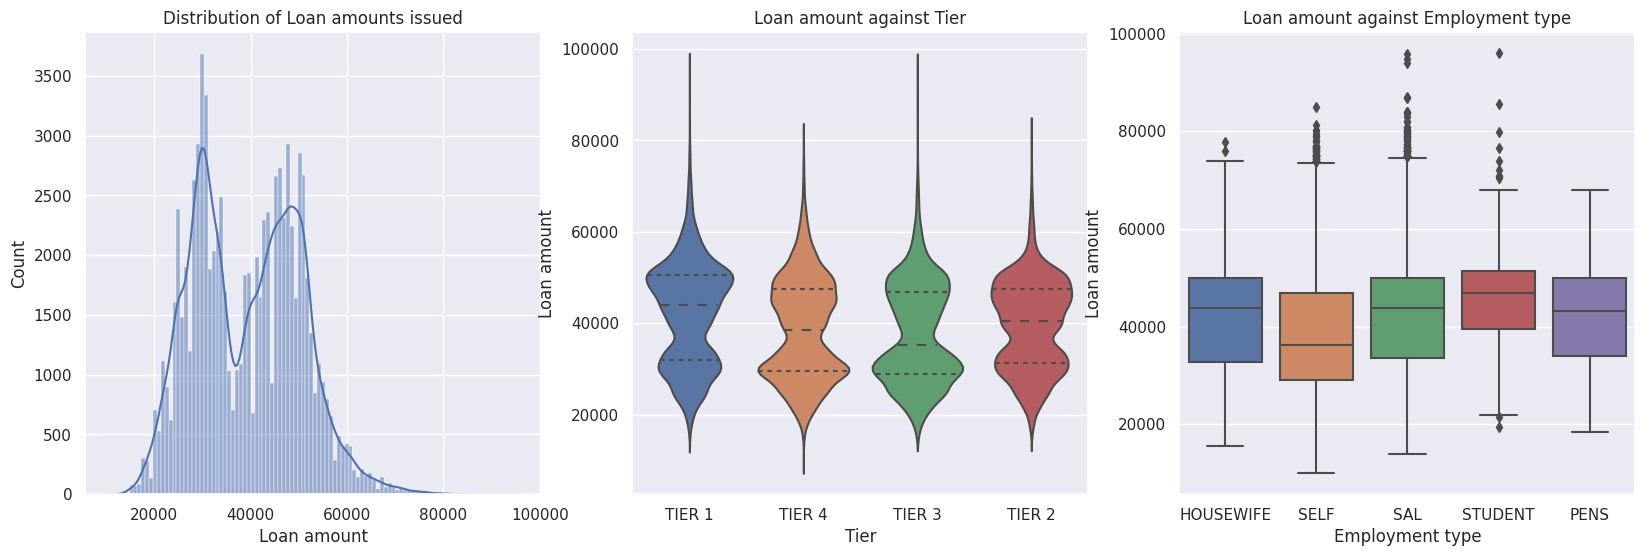

In [ ]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.histplot(data=data,x='Loan amount',kde=True,ax=ax[0])
ax[0].set_title('Distribution of Loan amounts issued')
sns.violinplot(data=data,x='Tier',y='Loan amount',ax=ax[1],inner='quartiles')
ax[1].set_title('Loan amount against Tier')
sns.boxplot(data=data,x='Employment type',y='Loan amount')
ax[2].set_title('Loan amount against Employment type')

In [ ]:
data['Loan amount'].value_counts().sort_values(ascending = False)

30000.0    1492
45900.0    1186
42900.0    1180
48900.0    1122
25000.0    1096
           ... 
35455.0       1
48109.0       1
28406.0       1
33380.0       1
27786.0       1
Name: Loan amount, Length: 6289, dtype: int64

In [ ]:
peak1 = data[data['Loan amount'].between(24999,30001)]
peak1['Product code of Two wheeler'].value_counts()

MO    11846
TL     1442
SC      786
MC      769
Name: Product code of Two wheeler, dtype: int64

In [ ]:
peak2 = data[data['Loan amount'].between(42899,45901)]
peak2['Product code of Two wheeler'].value_counts()

SC    4531
MC    4314
TL     450
Name: Product code of Two wheeler, dtype: int64

**Customer age distribution as well as correlation with amounts and Target variable**

Text(0.5, 1.0, 'Distribution of Target variables amongst the customer age')

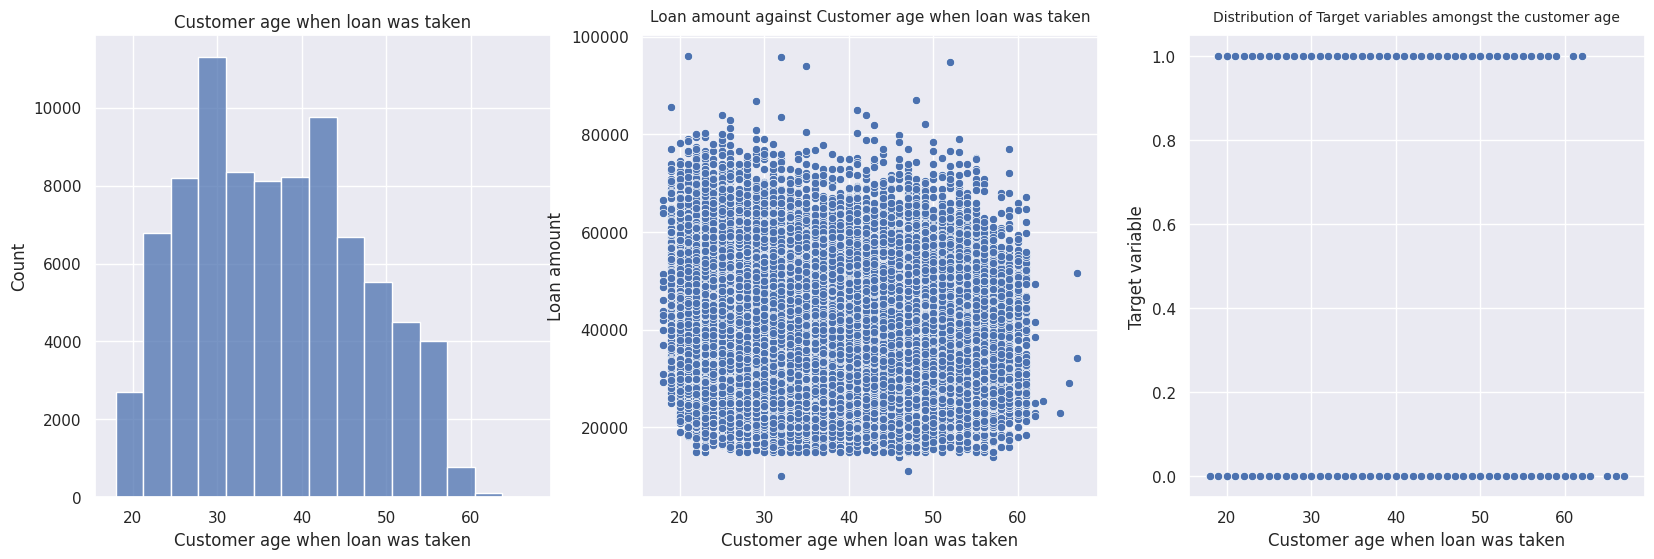

In [ ]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.histplot(data=data,x=data['Customer age when loan was taken'],bins=15,ax=ax[0])
ax[0].set_title('Customer age when loan was taken')
sns.scatterplot(data=data,x=data['Customer age when loan was taken'],y='Loan amount',ax=ax[1])
ax[1].set_title('Loan amount against Customer age when loan was taken',fontsize=11,pad=10)
sns.scatterplot(data=data,x=data['Customer age when loan was taken'],y='Target variable',ax=ax[2])
ax[2].set_title('Distribution of Target variables amongst the customer age',fontsize=10,pad=10)


Exploring the data types within the dataset.

In [ ]:
cat = data.dtypes == 'object'
cat_cols = cat[cat].index
cat_cols = list(cat_cols)
print('Categorical features :',len(cat_cols))

num = data.dtypes != 'object'
num_cols = num[num].index
num_cols = list(num_cols)
print('Numerical features :',len(num_cols))

Categorical features : 5
Numerical features : 25


In [ ]:
cat_df = data.select_dtypes(include='object')

In [ ]:
cat_df.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1


**Distribution of categorical features**

<Axes: xlabel='Tier', ylabel='Count'>

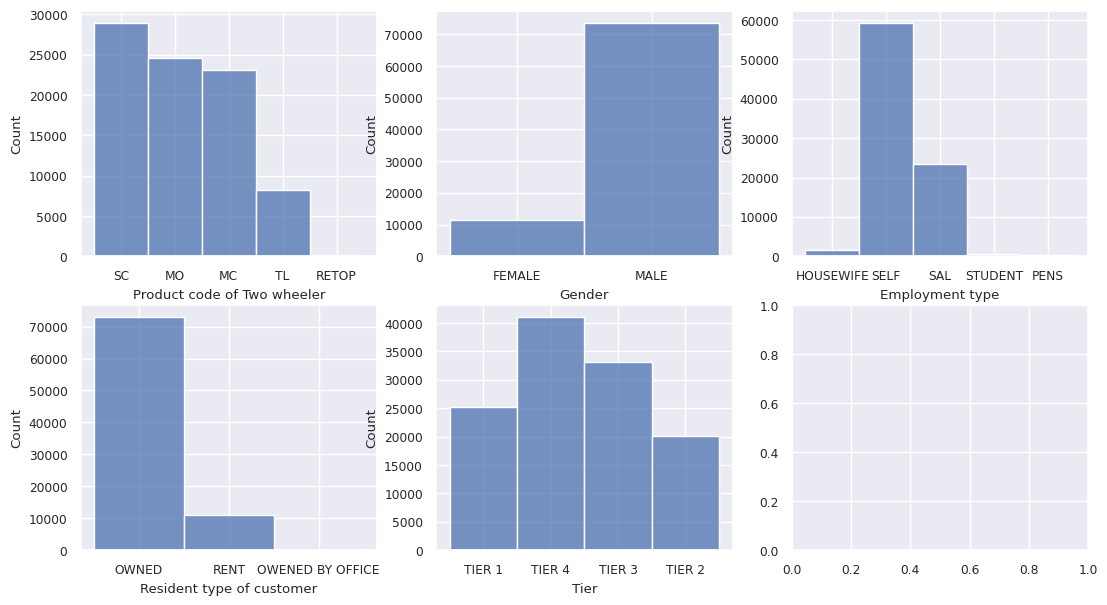

In [ ]:
sns.set(font_scale=0.8)
fig,ax = plt.subplots(2,3,figsize=(13,7))
sns.histplot(cat_df['Product code of Two wheeler'],ax=ax[0,0])
sns.histplot(cat_df['Gender'],ax=ax[0,1])
sns.histplot(cat_df['Employment type'],ax=ax[0,2])
sns.histplot(cat_df['Resident type of customer'],ax=ax[1,0])
sns.histplot(cat_df['Tier'],ax=ax[1,1])

In [ ]:
tier = data.query("Tier in ('TIER 3','TIER 4')")

In [ ]:
tier['Employment type'].value_counts()

SELF         38484
SAL          12822
HOUSEWIFE     1029
STUDENT        294
PENS           194
Name: Employment type, dtype: int64

In [ ]:
data['Rate of interest'].describe()

count    85048.000000
mean        11.703803
std          3.980542
min          0.000000
25%          9.500000
50%         12.600000
75%         14.090000
max         20.650000
Name: Rate of interest, dtype: float64

In [ ]:
tier['Rate of interest'].value_counts()

13.50    2349
13.00    2301
14.09    2165
3.99     2132
12.50    1719
         ... 
6.46        1
9.83        1
17.62       1
7.37        1
8.28        1
Name: Rate of interest, Length: 882, dtype: int64

**Rate of interest distribution and correlation**

<Axes: xlabel='Rate of interest', ylabel='No of advance EMI paid'>

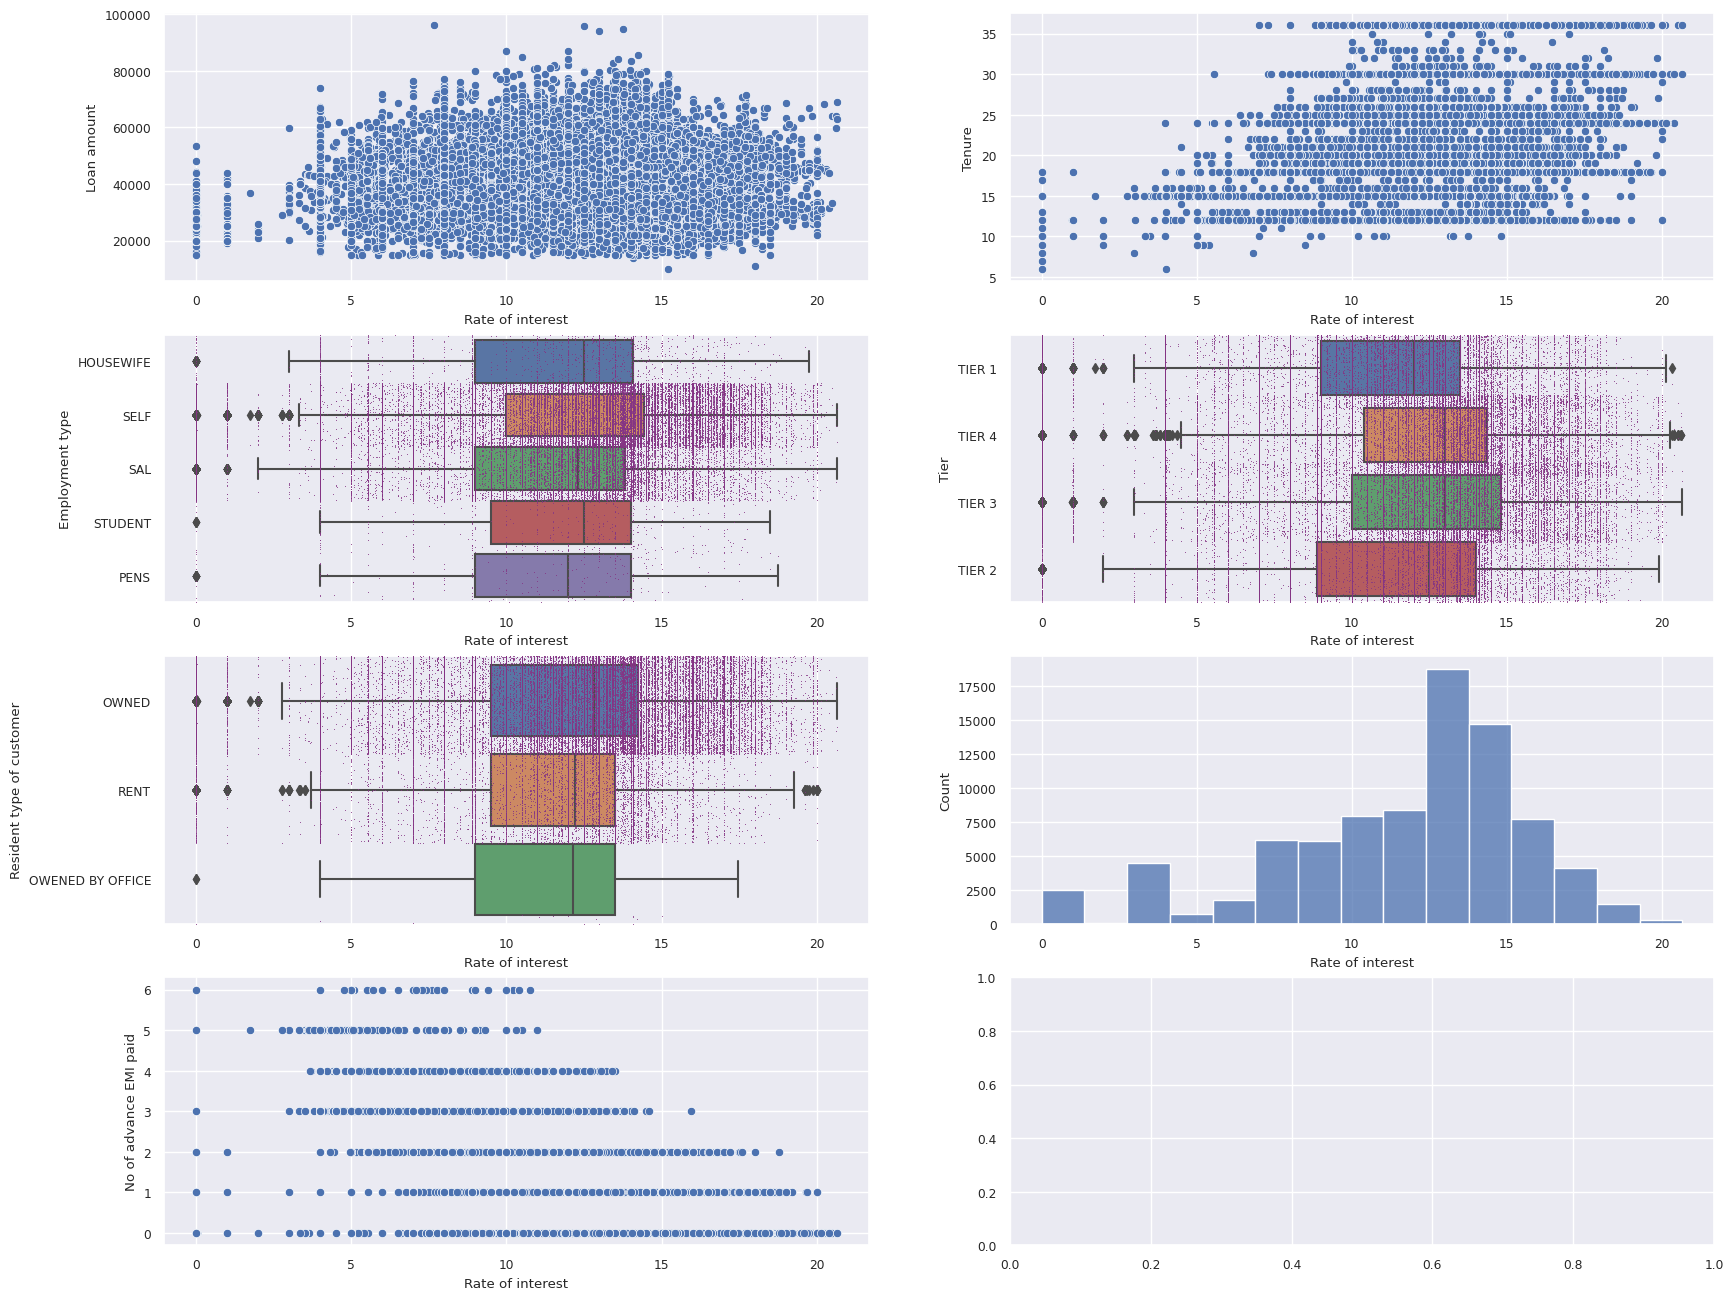

In [ ]:
sns.set(font_scale=0.8)
fig, ax = plt.subplots(4,2,figsize=(20,16))
sns.scatterplot(data=data,x='Rate of interest',y='Loan amount',ax=ax[0,0])
sns.scatterplot(data=data,x='Rate of interest',y='Tenure',ax=ax[0,1])
sns.boxplot(data=data,x='Rate of interest',y='Employment type',ax=ax[1,0])
sns.stripplot(data=data,x='Rate of interest',y='Employment type',jitter=0.6,color='magenta',size=0.6,ax=ax[1,0])
sns.boxplot(data=data,x='Rate of interest',y='Tier',ax=ax[1,1])
sns.stripplot(data=data,x='Rate of interest',y='Tier',jitter=0.6,color='magenta',size=0.6,ax=ax[1,1])
sns.boxplot(data=data,x='Rate of interest',y='Resident type of customer',ax=ax[2,0])
sns.stripplot(data=data,x='Rate of interest',y='Resident type of customer',jitter=0.6,color='magenta',size=0.6,ax=ax[2,0])
sns.histplot(data=data,x='Rate of interest',ax=ax[2,1],bins=15)
sns.scatterplot(data=data,x='Rate of interest',y='No of advance EMI paid',ax=ax[3,0])

In [ ]:
rate = data[data['Rate of interest'] == 0]

In [ ]:
rate['Employment type'].value_counts()

SELF         1736
SAL           520
HOUSEWIFE      36
PENS           10
STUDENT         4
Name: Employment type, dtype: int64

In [ ]:
rate['Loan amount'].unique()

array([30000., 27000., 25900., 20000., 25000., 28900., 27500., 27314.,
       27514., 28655., 24740., 35000., 30900., 20900., 22000., 40000.,
       40900., 23000., 34000., 44300., 36000., 20500., 21899., 24000.,
       32000., 24900., 21000., 22900., 22400., 33000., 31000., 28000.,
       20250., 22500., 16450., 17500., 30550., 33500., 35900., 15050.,
       23480., 29200., 35550., 30700., 22750., 15000., 32500., 22720.,
       29140., 38900., 28099., 39900., 39200., 27099., 26000., 16645.,
       23900., 26900., 27700., 28240., 29400., 27600., 29000., 28719.,
       25524., 24624., 19400., 27819., 34500., 27900., 24200., 29800.,
       27817., 23724., 21900., 19900., 44000., 24400., 19000., 25500.,
       35500., 41000., 25054., 28458., 26600., 23960., 25650., 38000.,
       25200., 20151., 30500., 27300., 25700., 37000., 25954., 25680.,
       27100., 29358., 23500., 21700., 53450., 28700., 25100., 27820.,
       24424., 27400., 29500., 24500., 25045., 16234., 25530., 18900.,
      

In [ ]:
rate['No of advance EMI paid'].value_counts()

0.0    2199
1.0      87
2.0      17
6.0       1
5.0       1
3.0       1
Name: No of advance EMI paid, dtype: int64

In [ ]:
num_df = data.select_dtypes(exclude='object')
num_df.head(3)

,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,12.75,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,13.65,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,12.65,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,0


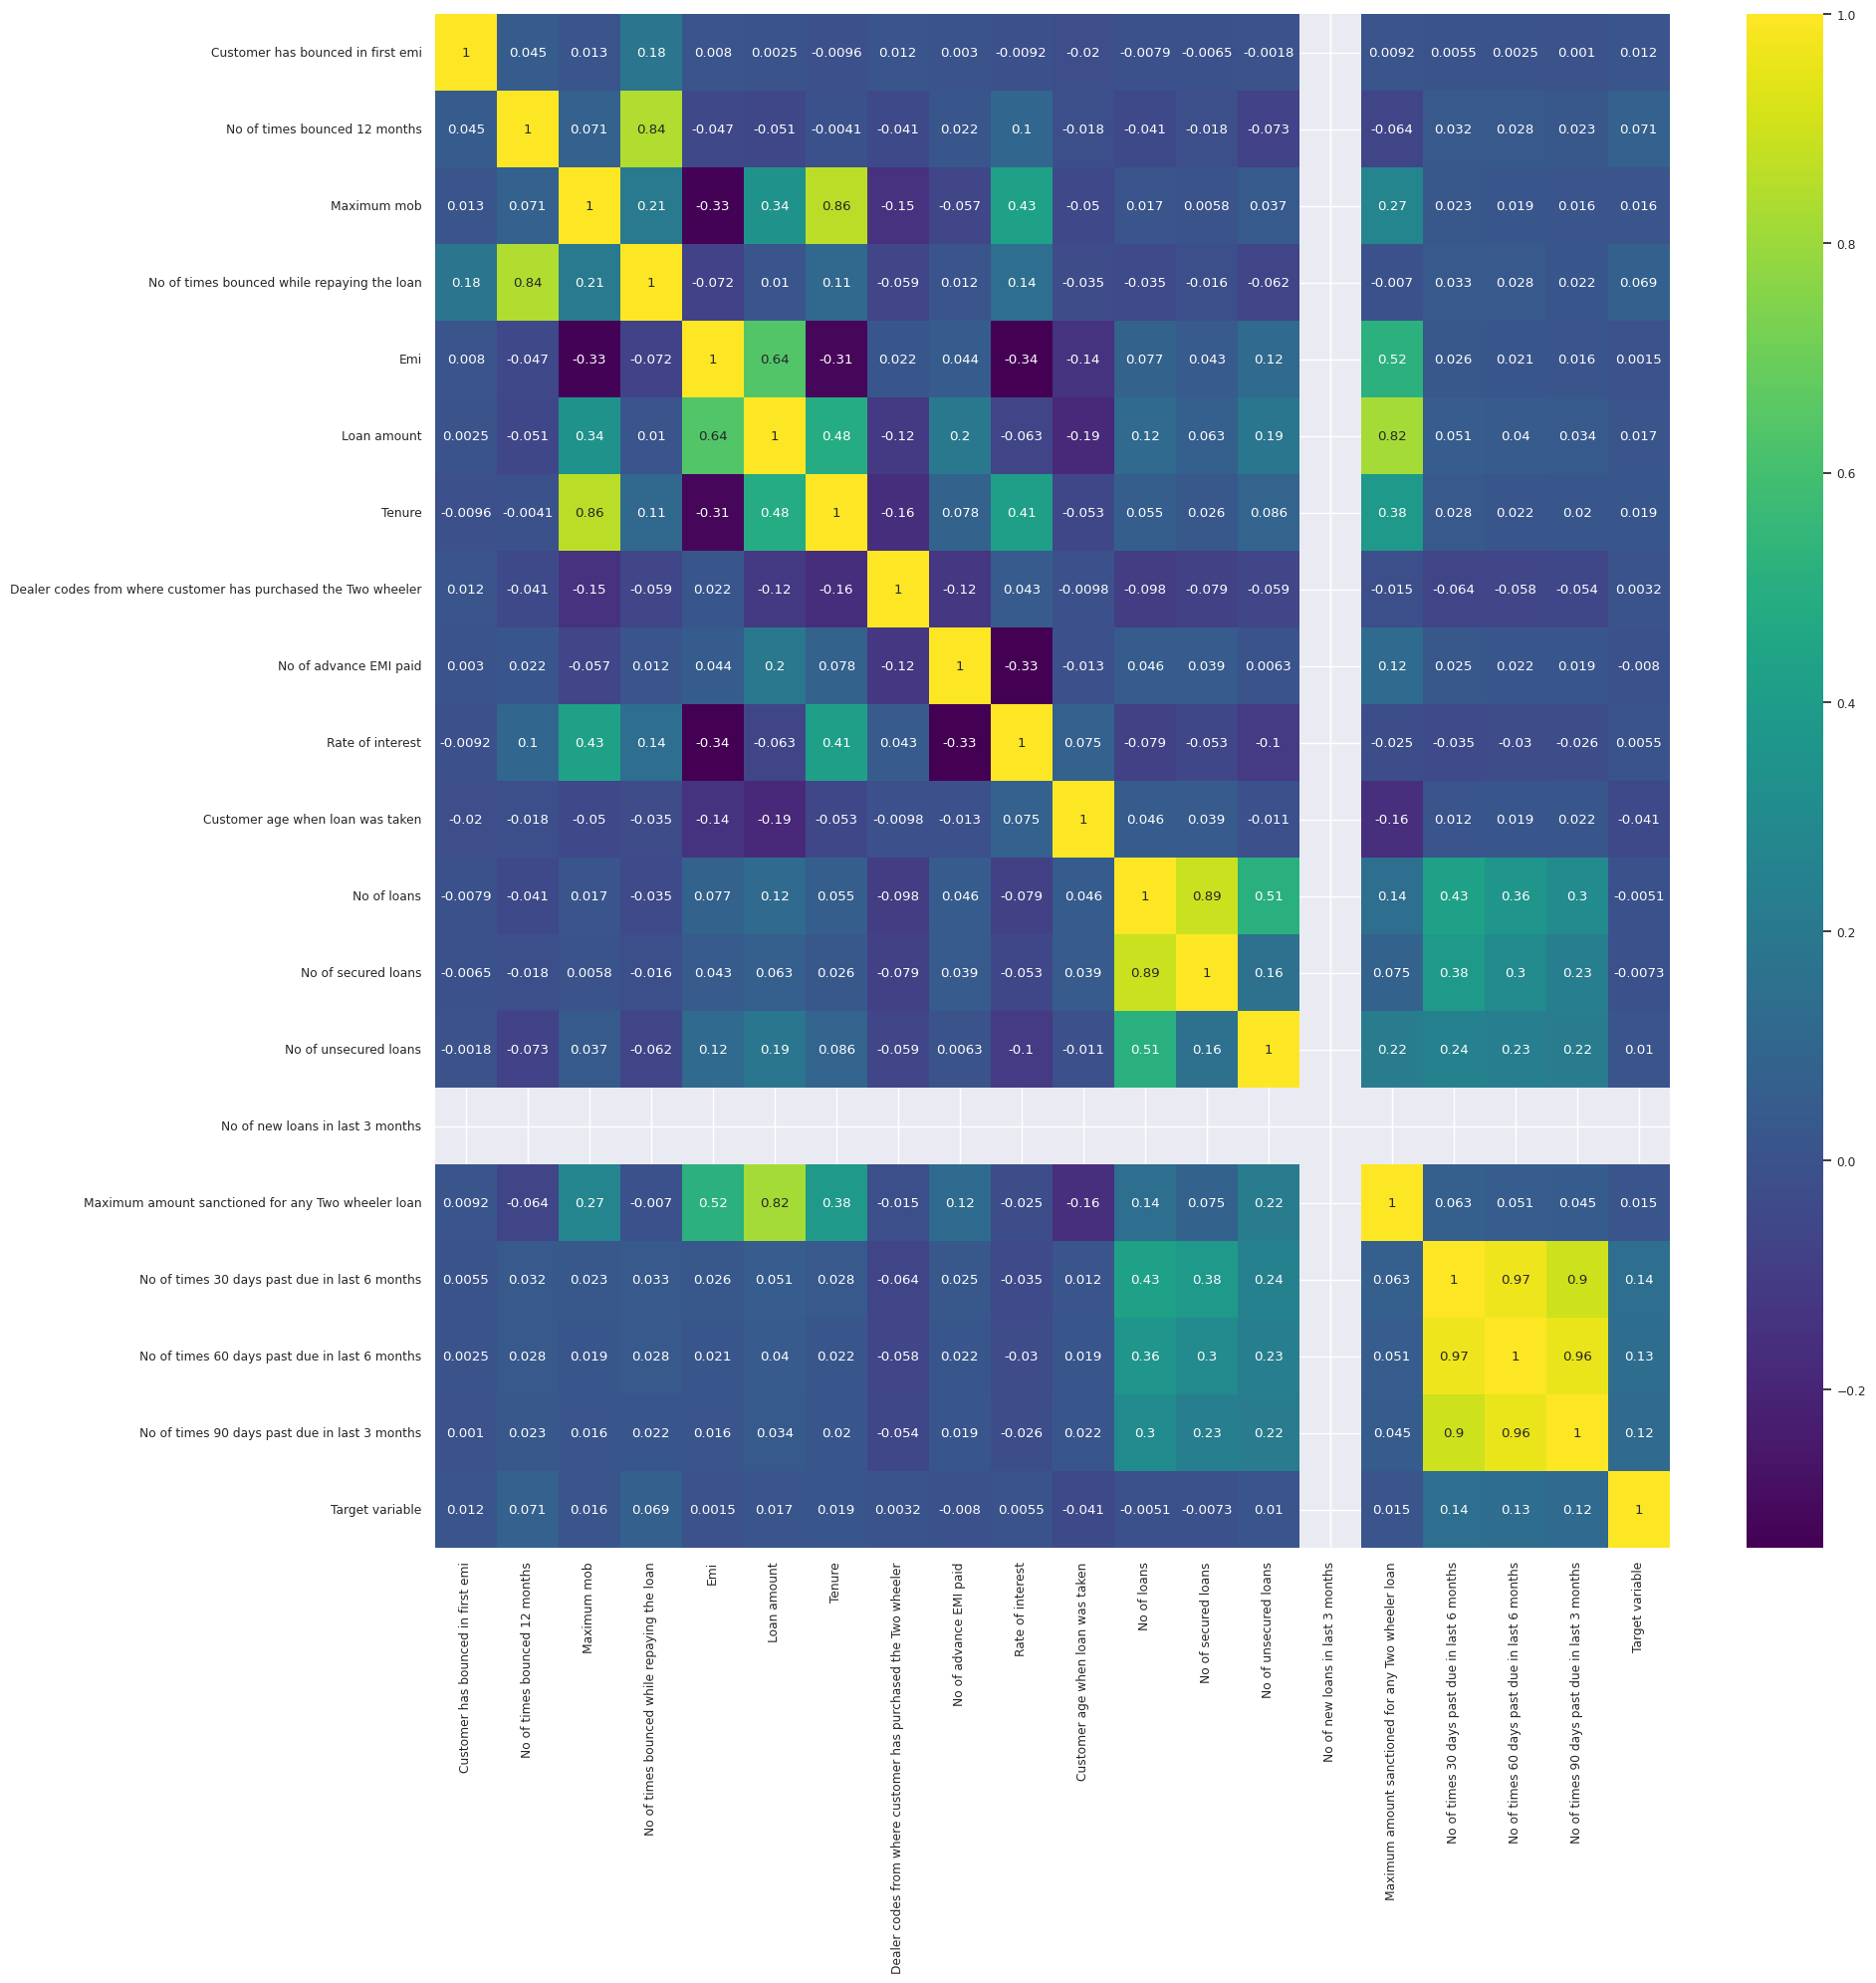

In [ ]:
corr_mat = num_df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="viridis")

**Detecting outliers**

In [ ]:
def outliers(df):
  cols = list(df)
  outliers = pd.DataFrame(columns=['Feature'])
  for col in cols:
    if col in df.select_dtypes(exclude='object').columns:
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      fence_low = q1 - (1.5*iqr)
      fence_high = q3 + (1.5*iqr)
      outliers = outliers.append({'Feature':col, 'Number of Outliers':df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]},ignore_index=True)
    return outliers

outliers(num_df)

<ipython-input-12-b6cf37046df1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature':col, 'Number of Outliers':df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]},ignore_index=True)


,Feature,Number of Outliers
0,Customer has bounced in first emi,3392.0


In [ ]:
data['Customer has bounced in first emi'].value_counts()

0    116136
1      3392
Name: Customer has bounced in first emi, dtype: int64

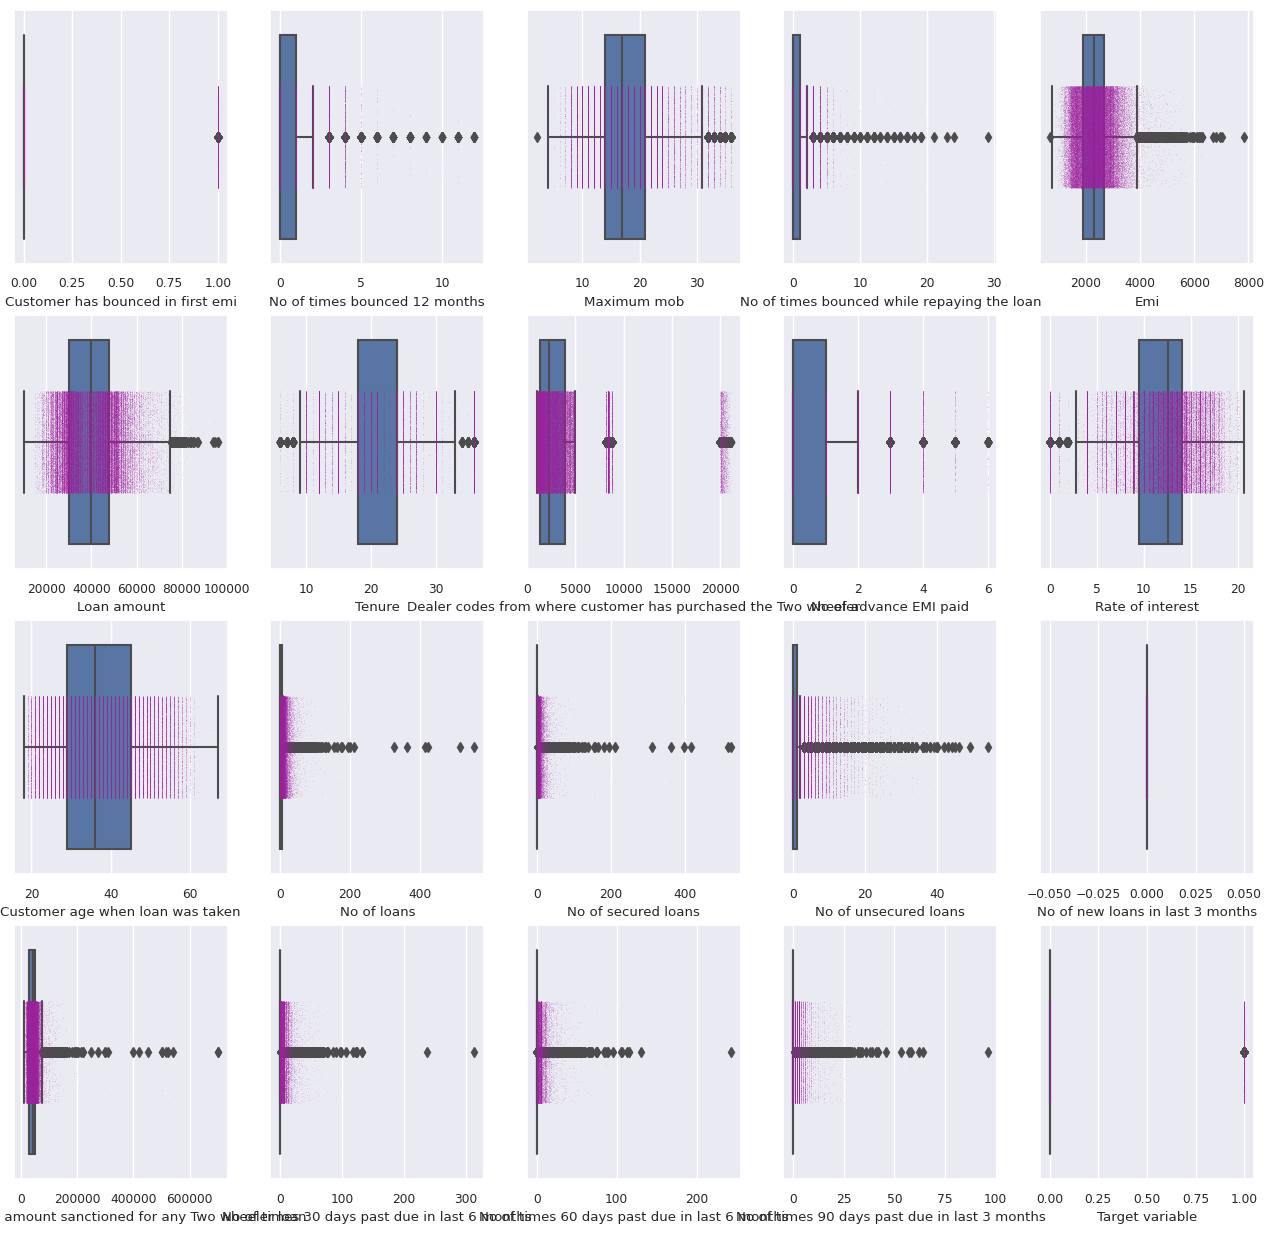

In [ ]:
sns.set(font_scale=0.8)
fig=plt.figure(figsize=(16,35))
for i in range(len(num_df.columns)):
  fig.add_subplot(9,5,i+1)
  sns.boxplot(x=num_df.iloc[:,i])
  sns.stripplot(x=num_df.iloc[:,i],jitter=0.2,color='magenta',size=0.2)


**Distribution of our Target Variables within the dataset**

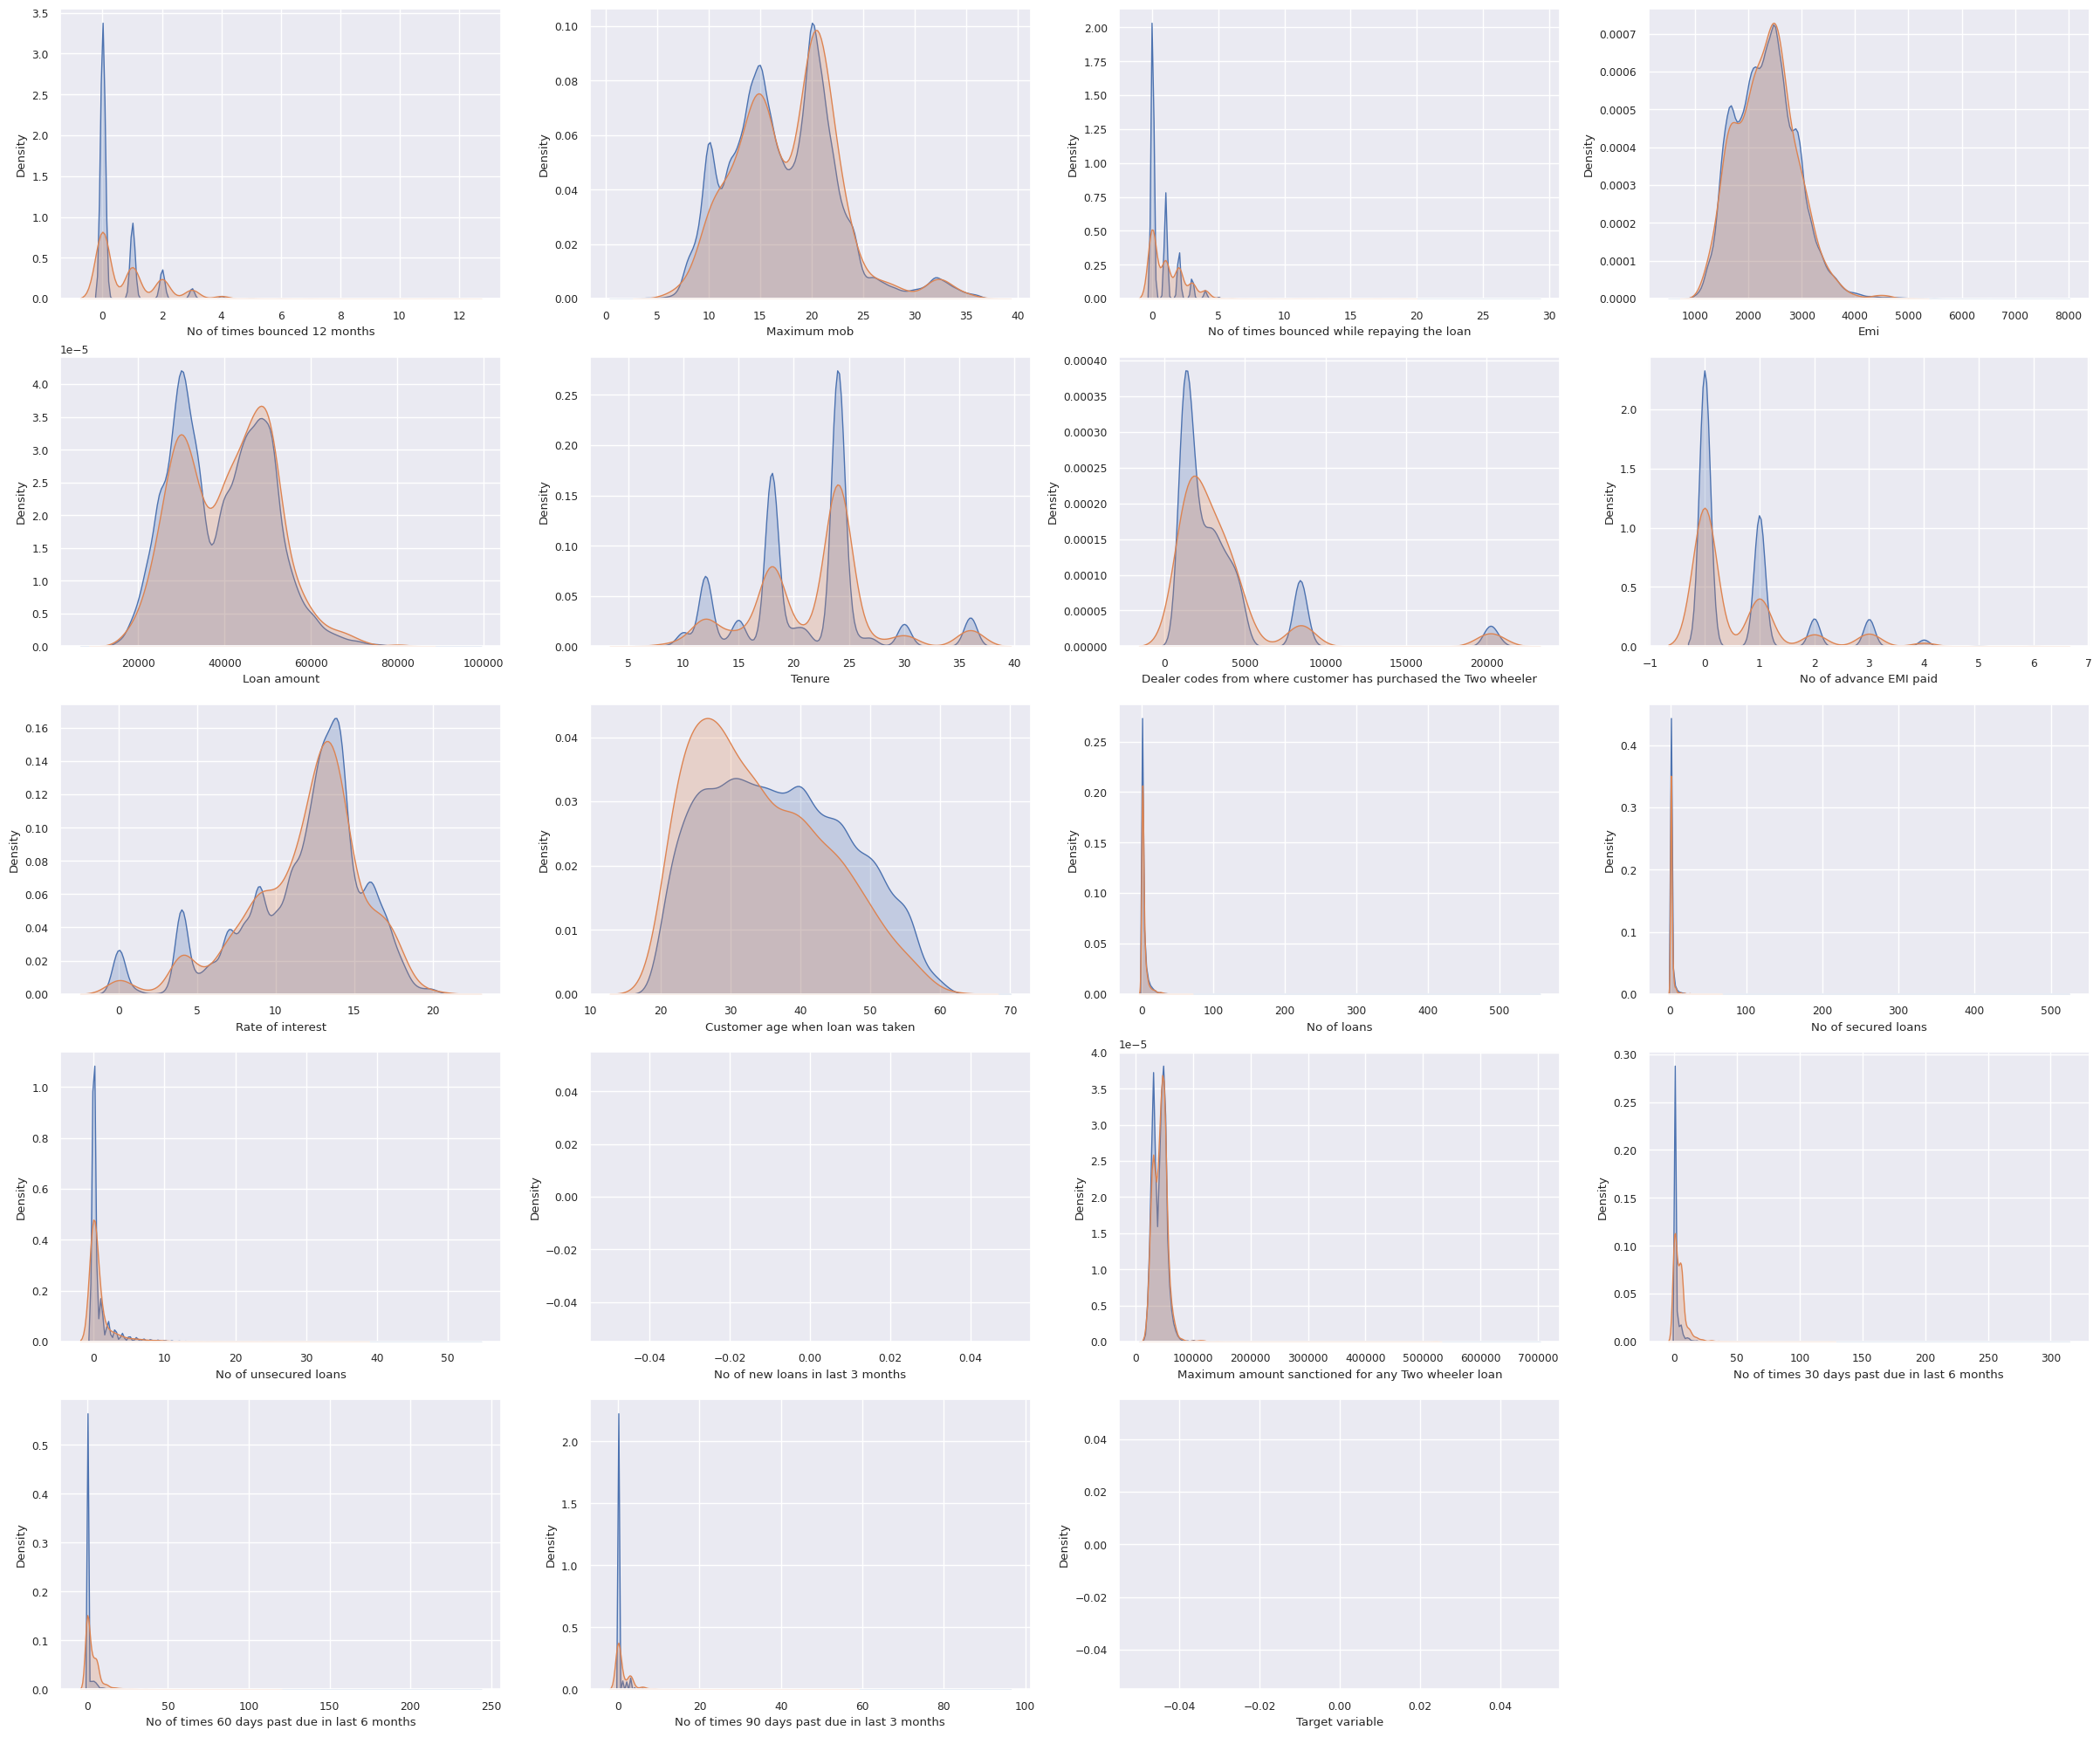

In [ ]:
# Bivariate analysis
fig = plt.figure(figsize=(30,25))
for i in range(1,len(num_df.columns)):
    ax = fig.add_subplot(5,4, i)
    sns.kdeplot(num_df[num_df.columns[i]][data['Target variable'] == 0], label='Category 1', fill=True,warn_singular=False)
    sns.kdeplot(num_df[num_df.columns[i]][data['Target variable'] == 1], label='Category 2', fill=True,warn_singular=False)

# Insights from Exploratory Data Analysis
**Distribution of loan amounts within a couple of features**

*   There appears to be 2 peak regions within the loan amounts issued corresponding to different product codes
*   Loan amounts seem to decrease with tier, with Tier 1 holding higher amounts through to Tier 4
*   Students see to enjoy the highest median loan amount while Self employed received the least median amount

**Customer age correlation and distribution**

*   Majority of customers range between the ages of 30 - 40
*   There appears a slight decrease in loan amounts issued with increase in age
*   No bias is evident on defaulting with regards to customer age

**Distribution of categorical features**



*   More males than females taking loans
*   Majority of the customer base are either self employed or salaried , owned vs rent and belonging to Tiers 3 and 4.












**Distribution of our Target Variables within the dataset.**
There seems to be no linear separability within out two classes.
This suggests that our choice of model will lean towards a non_linear binary classification model.

Checking the distribution between defaulters and non defaulters in our dataset.

([<matplotlib.axis.XTick at 0x7fd93fea1930>,
 [Text(0, 0, 'Non defaulter'), Text(1, 0, 'Defaulter')])

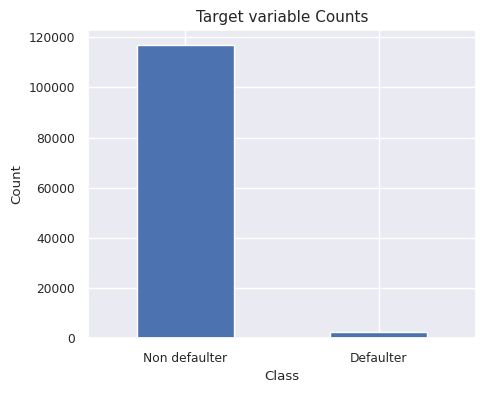

In [ ]:
data['Target variable'].value_counts().plot(kind='bar',figsize=(5,4))
plt.title('Target variable Counts',fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Non defaulter','Defaulter'],rotation=0)

In [ ]:
len(data[data['Target variable'] == 1])/len(data[data['Target variable'] == 0]) * 100

2.2358314658637974

It's clear there's a big imbalance in our data with defaulters with defaulters account about 2% of the non defaulters.

# Data Cleaning

## Imputation of missing values

Text(0.5, 1.0, 'Missing Values Heatmap')

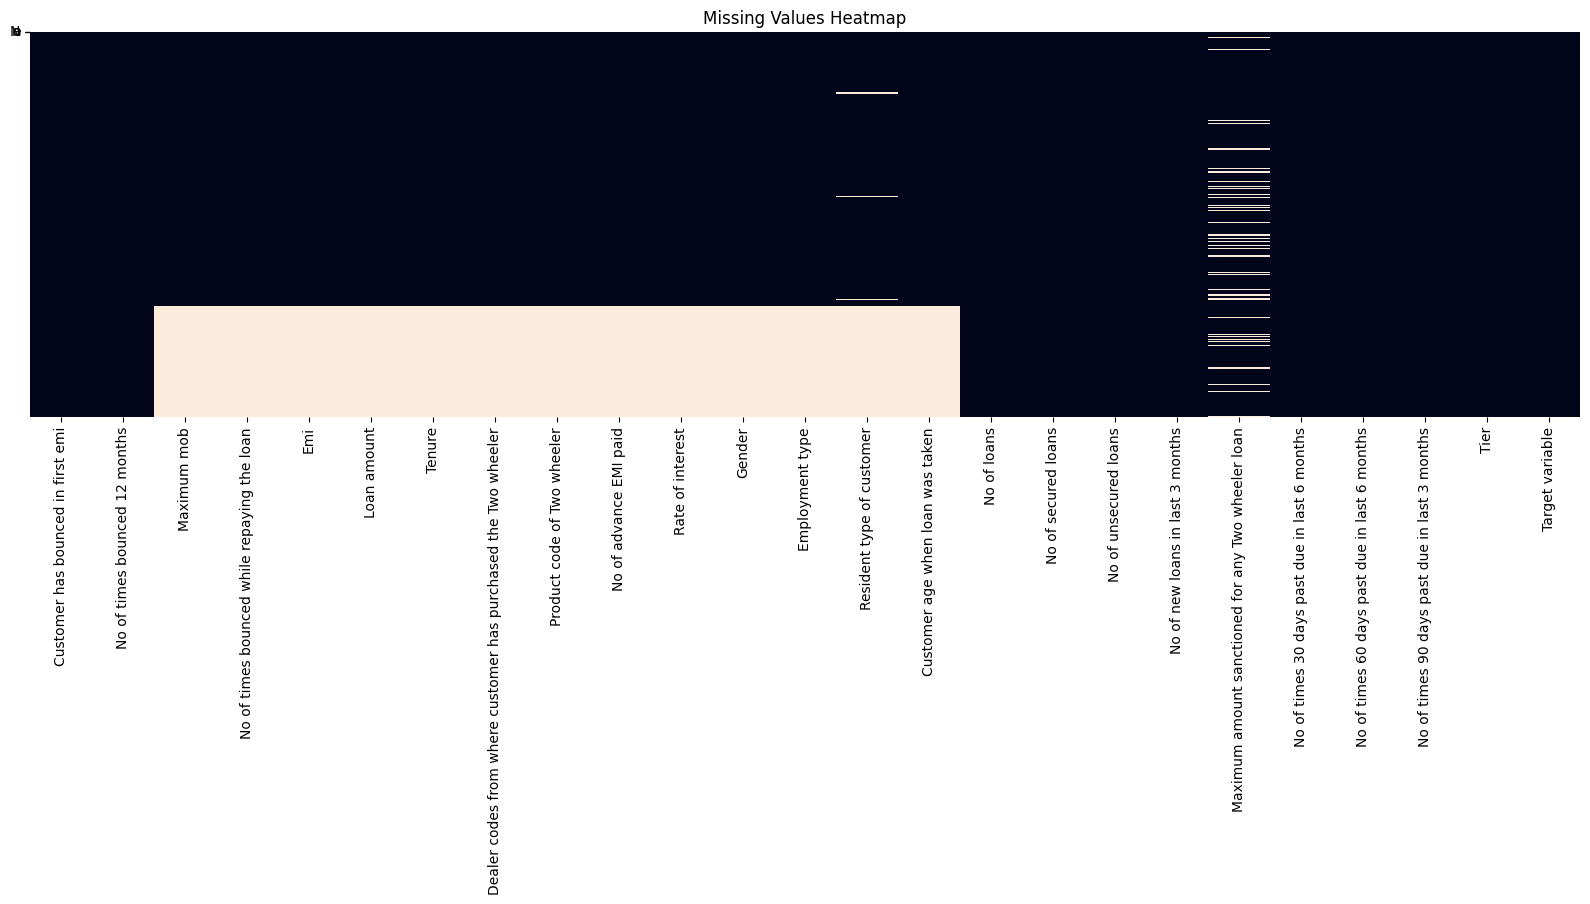

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")     

In [ ]:
len(data[data.isnull().any(axis=1)])/len(data) * 100

38.481360016063185

Due to the large percentage of rows with missing values in our dataset(abt 40%), we'll refrain from dropping the rows.
We'll apply mean imputation due most of the data being well distributed within the features.

In [ ]:
miss_cols = list(missing_value_df.index)

for i in miss_cols:
  if i in num_cols:
    data[i] = data[i].fillna(data[i].mean())

data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

Text(0.5, 1.0, 'Missing Values Heatmap')

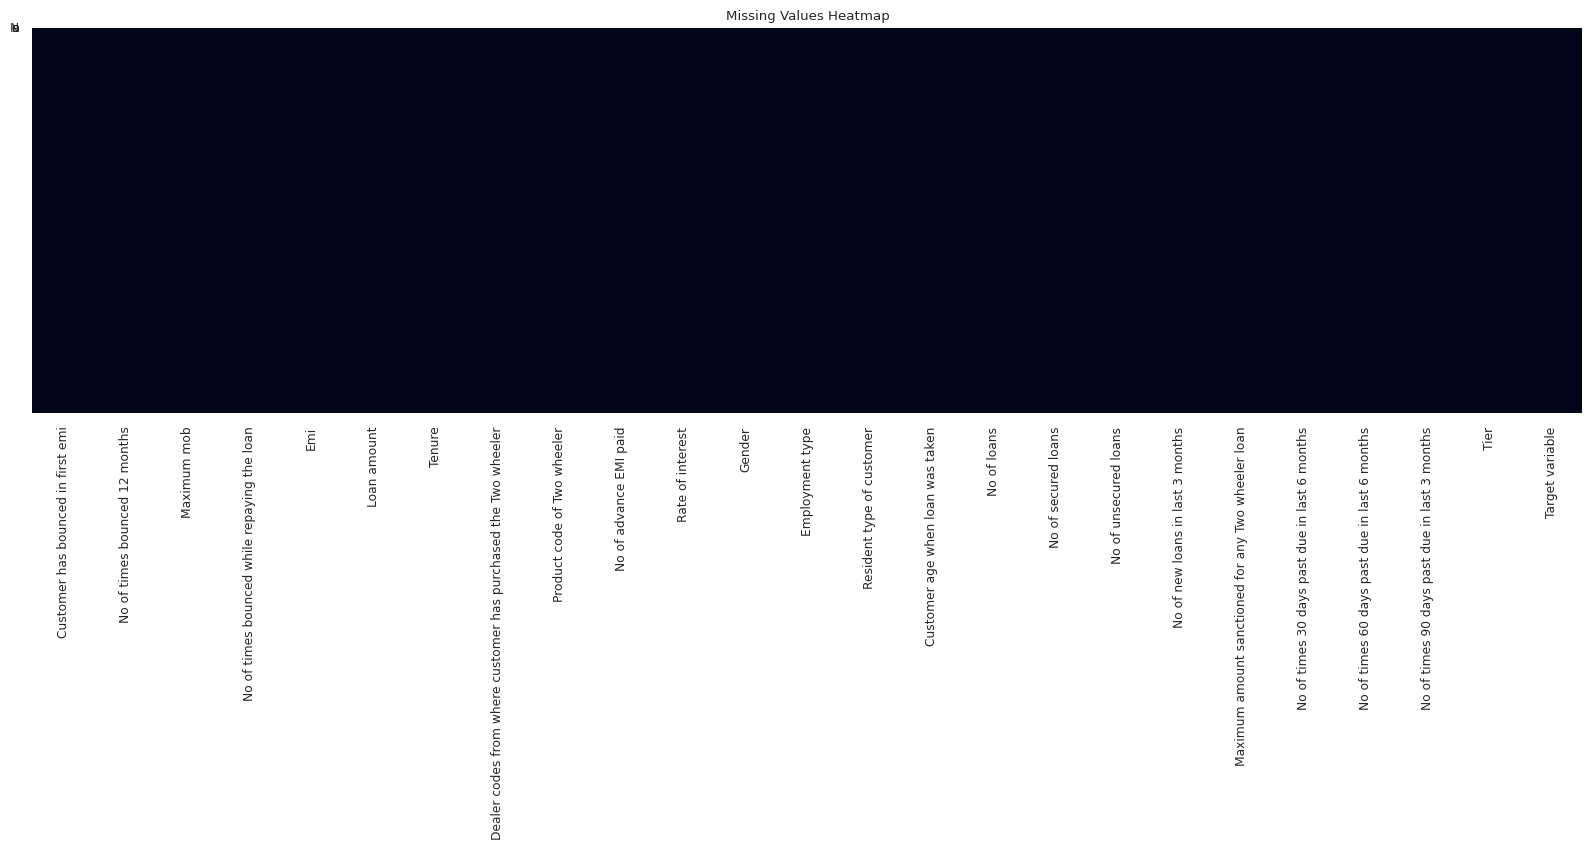

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap") 

# Encoding

**Label encoding**

In [ ]:
lab = LabelEncoder()

data['Tier'] = lab.fit_transform(data['Tier'])

**OneHot Encoding**

In [ ]:
fin_df = pd.get_dummies(data)
fin_df.head(3)

,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable,Product code of Two wheeler_MC,Product code of Two wheeler_MO,Product code of Two wheeler_RETOP,Product code of Two wheeler_SC,Product code of Two wheeler_TL,Gender_FEMALE,Gender_MALE,Employment type_HOUSEWIFE,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWENED BY OFFICE,Resident type of customer_OWNED,Resident type of customer_RENT
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,12.75,40.0,1,1,0,274219.207448,0,430252.2253,176649.426109,46500.0,46.98094,48.208976,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,13.65,47.0,1,1,0,274219.207448,0,430252.2253,176649.426109,28168.0,46.98094,48.208976,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,12.65,31.0,9,6,3,55000.000000,0,430252.2253,105000.000000,38900.0,34.00000,31.000000,31,31,16,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# Feature Scaling

In [ ]:
scale_df = fin_df.drop(['Tier','Target variable'],axis=1)

We'll employ MinMaxScaler since the distribution of most numerical variables is not uniform.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(scale_df)
scaled = scaler.fit_transform(scale_df)
scaled_df = pd.DataFrame(scaled, columns=scale_df.columns)

In [ ]:
scaled_df['Tier'] = fin_df['Tier'].values
scaled_df['Target variable'] = fin_df['Target variable'].values
scaled_df.head()

,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Product code of Two wheeler_MC,Product code of Two wheeler_MO,Product code of Two wheeler_RETOP,Product code of Two wheeler_SC,Product code of Two wheeler_TL,Gender_FEMALE,Gender_MALE,Employment type_HOUSEWIFE,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWENED BY OFFICE,Resident type of customer_OWNED,Resident type of customer_RENT,Tier,Target variable
0,0.0,0.000000,0.647059,0.000000,0.244587,0.424419,0.6,0.019100,0.000000,0.617433,0.448980,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.052899,0.173310,0.167458,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0.0,0.083333,0.647059,0.034483,0.113703,0.211256,0.6,0.074360,0.000000,0.661017,0.591837,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.026330,0.173310,0.167458,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,0.0,0.000000,0.705882,0.000000,0.143316,0.336047,0.8,0.017160,0.000000,0.612591,0.265306,0.016216,0.011472,0.055556,0.000550,0.0,0.021266,0.003500,0.041884,0.120968,0.102273,0.098726,0.127572,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3,0.0,0.000000,0.647059,0.000000,0.202123,0.382558,0.6,0.018602,0.333333,0.460048,0.122449,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.047681,0.173310,0.167458,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4,0.0,0.000000,0.735294,0.000000,0.159659,0.359302,0.8,0.156130,0.000000,0.653753,0.244898,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.044783,0.173310,0.167458,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0


In [ ]:
X_1 = scaled_df.drop(['Target variable'],axis=1)
y_1 = scaled_df['Target variable']

# Class Imbalance Handling

Due to the size of our dataset, we'll employ an oversampling technique (Smote) to generate more samples in our minority class.

<Axes: >

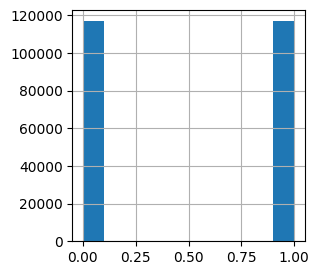

In [ ]:
X = fin_df.drop(['Target variable'],axis=1)
y = fin_df['Target variable']

smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X,y)

plt.figure(figsize=(3,3))
y_smote.hist()

Applying smote over the scaled dataframe

<Axes: >

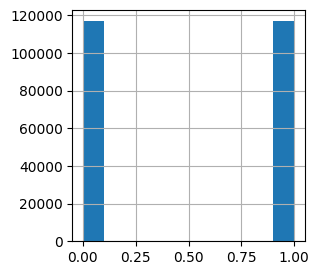

In [ ]:
X1_smote,y1_smote = smote.fit_resample(X_1,y_1)
plt.figure(figsize=(3,3))
y1_smote.hist()

# Modelling

We'll be applying non_linear classification models due to the non_linearity within our dataset of the target classes. 

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10)
scores = cross_validate(model,X_smote, y_smote, cv=10, scoring=['precision','recall','accuracy'])
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [15.13523507 27.20414567 22.65400434 21.31074762 16.91217136 16.47089005
 15.0344224  17.09443998 25.77334261 17.25209856] 19.484149765968322
score_time [0.17941308 0.27517581 0.29343295 0.17882419 0.17777729 0.17202377
 0.1773684  0.22965932 0.16116905 0.22854948] 0.20733933448791503
test_precision [0.77607612 0.79106066 0.82903851 0.84985354 0.87362904 0.88777712
 0.89548273 0.79567797 0.8216451  0.81624319] 0.8336483994510729
test_recall [0.7325293  0.76298007 0.76777008 0.76930973 0.76984263 0.77403353
 0.77822443 0.76838864 0.77666581 0.76939526] 0.7669139467177881
test_accuracy [0.7605953  0.78073814 0.80472993 0.81670444 0.82923491 0.8380875
 0.84368986 0.78552795 0.80403729 0.79809255] 0.8061437887775027


Modelling on the scaled dataframe

In [ ]:
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10)
scores = cross_validate(model,X1_smote, y1_smote, cv=10, scoring=['precision','recall','accuracy'])
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [17.27978969 16.84302497 16.78891897 16.95611095 19.01862359 16.74557447
 16.86844683 16.95311189 18.11438465 16.92289758] 17.24908835887909
score_time [0.18083215 0.17495394 0.17537999 0.25270677 0.18348861 0.17468739
 0.179842   0.24612117 0.16341138 0.17032337] 0.19017467498779297
test_precision [0.78488911 0.79414626 0.82706704 0.84308693 0.86686001 0.88295211
 0.89566247 0.81401979 0.84024683 0.83371726] 0.8382647805749583
test_recall [0.79616799 0.83782397 0.84107433 0.84287058 0.84365378 0.84519329
 0.84066028 0.83031132 0.83859379 0.83585664] 0.8352205985913999
test_accuracy [0.788992   0.81033229 0.83261344 0.8430056  0.85703289 0.86656973
 0.87135953 0.8202968  0.83957745 0.8345736 ] 0.8364353340078534


**KNN Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn,X_smote, y_smote, cv=10, scoring=['precision','recall','accuracy'])
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [0.14400768 0.10026336 0.10262322 0.09856391 0.10354567 0.10055041
 0.10491872 0.12617087 0.10284948 0.11351061] 0.10970039367675781
score_time [32.63684177 32.28253269 32.23610091 34.42790055 32.33172226 32.17601585
 34.02242899 32.3662765  32.36145234 36.23856282] 33.107983469963074
test_precision [0.7843722  0.80571646 0.81806883 0.83165671 0.83036133 0.82945432
 0.80838734 0.82780952 0.86993133 0.86390677] 0.826966482106268
test_recall [0.89983748 0.90419981 0.90077838 0.90514071 0.90805679 0.90224085
 0.90677386 0.92926788 0.91018732 0.90676589] 0.9073248965924442
test_accuracy [0.82624129 0.84309113 0.85023308 0.86096737 0.86126673 0.85835864
 0.8459137  0.86798101 0.88704987 0.88196048] 0.858306329428858


Modelling on the scaled dataframe

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn,X1_smote, y1_smote, cv=10, scoring=['precision','recall','accuracy'])
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [0.10106301 0.1442368  0.13028646 0.10479403 0.10173392 0.11308789
 0.10346556 0.10405588 0.10420418 0.11043215] 0.11173598766326905
score_time [32.174896   33.38818932 32.93937945 32.29731011 32.16675997 34.47337484
 32.16732454 32.12749481 36.36749268 32.21232677] 33.03145484924316
test_precision [0.78790882 0.84293273 0.86366793 0.86690004 0.8640062  0.86894831
 0.84873693 0.85778815 0.89632777 0.89417608] 0.8591392960739531
test_recall [0.95201437 0.95389616 0.95748867 0.95321187 0.95364352 0.9533014
 0.95116319 0.97451249 0.95620563 0.95475152] 0.9560188810144961
test_accuracy [0.84788094 0.88808108 0.90317752 0.90343412 0.90176624 0.90475987
 0.89081812 0.90647051 0.92280387 0.92087931] 0.8990071576922339


# Hyperparameter Tuning

We'll focus on the best performing models to tune for optimal performance before settling on the optimal model for this task.

**KNN Classifier**

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid = {'n_neighbors' : [5,10,15],
              'weights' : ['uniform','distance'],
              'p' : [1,2]}

In [ ]:
knn = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_grid,cv=5,scoring='f1',n_iter=7)
knn.fit(X1_smote,y1_smote)

print(knn.best_score_,knn.best_params_)

0.9173991852163474 {'weights': 'distance', 'p': 1, 'n_neighbors': 5}


**Further optimization of KNN**

In [ ]:
# Iteration 1
parameters = {'weights':['distance'],'p':[1],'n_neighbors':[4,5,6]}

knn = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=parameters,cv=5,scoring='f1')
knn.fit(X1_smote,y1_smote)


In [ ]:
print(knn.best_score_,knn.best_params_,knn.best_estimator_)

0.9292800521179443 {'weights': 'distance', 'p': 1, 'n_neighbors': 4} KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')


In [ ]:
iter1_nneighbors = knn.cv_results_['param_n_neighbors'].data
iter1_score = knn.cv_results_['split0_test_score'].data

In [ ]:
# iteration 2
parameters = {'weights':['distance'],'p':[1],'n_neighbors':[2,3,4]}

knn = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=parameters,cv=5,scoring='f1')
knn.fit(X1_smote,y1_smote)

print(knn.best_score_,knn.best_params_,knn.best_estimator_)

iter2_nneighbors = knn.cv_results_['param_n_neighbors'].data
iter2_score = knn.cv_results_['split0_test_score'].data

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.9433303034515962 {'weights': 'distance', 'p': 1, 'n_neighbors': 2} KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')


**Final Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1_smote,y1_smote, test_size = 0.3, random_state = 42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=2,p=1,weights='distance')
model.fit(x_train,y_train)

yhat = model.predict(x_test)
train_pred = model.predict(x_train)

print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Test Accuracy : {accuracy_score(y_test,yhat)}')

Train Accuracy : 0.9869806144954454
Test Accuracy : 0.957732825842136


In [ ]:
print(classification_report(yhat,y_test))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     34026
           1       0.97      0.95      0.96     36123

    accuracy                           0.96     70149
   macro avg       0.96      0.96      0.96     70149
weighted avg       0.96      0.96      0.96     70149



**Random Forest Classifier**

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'criterion': ['gini','entropy'],
 'max_depth': [2,4,6,10,20,30],
 'max_features': ['sqrt','log2',None],
 'min_samples_leaf': [1,2,4], 
 'n_estimators': [10,25,50]}

In [ ]:
grid_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions = param_grid,cv=5,n_iter=15,scoring=['precision','recall','accuracy'])
grid_search.fit(X1_smote, y1_smote)
print(grid_search.best_score_,grid_search.best_params_)

0.9563737612613638 {'n_estimators': 50, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}


**Further optimization of the Random Forest**

In [ ]:
# Iteration 1:
parameters = {'criterion':['gini'],'max_features':['log2'],'min_samples_leaf':[1],'max_depth':[30,50,75],'n_estimators': [50,100]}

grid_search = GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=5)
grid_search.fit(X1_smote,y1_smote)

print(grid_search.best_score_,grid_search.best_params_)

iter1_maxdepth = grid_search.cv_results_['param_max_depth'].data
iter1_scores = grid_search.cv_results_['split0_test_score'].data
iter1_nestimators = grid_search.cv_results_['param_n_estimators'].data


0.9579090830681729 {'criterion': 'gini', 'max_depth': 75, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}


AttributeError: ignored

In [ ]:
# Iteration 2:
parameters = {'criterion':['gini'],'max_features':['log2'],'min_samples_leaf':[1],'max_depth':[60,75,100],'n_estimators': [90,100,120]}

grid_search = GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=5)
grid_search.fit(X1_smote,y1_smote)

print(grid_search.best_score_,grid_search.best_params_)


iter2_maxdepth = grid_search.cv_results_['param_max_depth'].data
iter2_scores = grid_search.cv_results_['split0_test_score'].data
iter2_nestimators = grid_search.cv_results_['param_n_estimators'].data

0.9579390189808699 {'criterion': 'gini', 'max_depth': 75, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 120}


**Generating Credit Scores**

We will be using a RandomForestClassifier for Credit Score generation due to KNN's limited concept of probability.

**Our Ranking Basis**

*   0 - 250 : Bad Client
*   250 - 500 : 2nd Worse Group
*   500 - 750 : Credit Worthy Clients
*   750 - 1000 : Big Loan Clients





In [49]:
model = RandomForestClassifier(n_estimators=120,criterion='gini',max_depth=75,max_features='log2',min_samples_leaf=1)
model.fit(x_train,y_train)

score = (1-model.predict_proba(x_test)[:,1])*1000

In [51]:
x_test['Credit_score'] = score
x_test['Credit_Risk'] = yhat

In [54]:
x_test['Credit_score'].value_counts()

0.000000       13630
1000.000000    11740
8.333333        5209
991.666667      4960
16.666667       3069
               ...  
604.166667         1
7.083333           1
18.200887          1
954.735086         1
112.500000         1
Name: Credit_score, Length: 455, dtype: int64

In [53]:
x_test.head(10)

,Customer has bounced in first emi,No of times bounced 12 months,Maximum mob,No of times bounced while repaying the loan,Emi,Loan amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Product code of Two wheeler_MC,Product code of Two wheeler_MO,Product code of Two wheeler_RETOP,Product code of Two wheeler_SC,Product code of Two wheeler_TL,Gender_FEMALE,Gender_MALE,Employment type_HOUSEWIFE,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWENED BY OFFICE,Resident type of customer_OWNED,Resident type of customer_RENT,Tier,Credit_score,Credit_Risk
227833,0.0,0.166667,0.447563,0.023823,0.229739,0.341140,0.502002,0.124929,0.107322,0.566770,0.387829,0.001822,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.049226,0.173310,0.167458,0.022257,0.020576,0.000119,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.000000,1
34863,0.0,0.083333,0.382353,0.034483,0.122084,0.166628,0.400000,0.030540,0.166667,0.483777,0.591837,0.014414,0.003824,0.092593,0.002742,0.0,0.021266,0.005888,0.027536,0.137097,0.166667,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,900.000000,0
178327,0.0,0.113776,0.578902,0.047080,0.327374,0.575596,0.600000,0.120247,0.166667,0.532203,0.129904,0.003032,0.001912,0.012642,0.002742,0.0,0.021266,0.005888,0.071741,0.173310,0.086757,0.014055,0.016856,0.021333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0.000000,1
28114,0.0,0.250000,0.558824,0.137931,0.182847,0.317442,0.600000,0.130316,0.000000,0.677966,0.285714,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.039565,0.173310,0.167458,0.019108,0.024691,0.031250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,50.000000,1
225443,0.0,0.032035,0.389152,0.013256,0.232417,0.406608,0.584675,0.025199,0.102597,0.502554,0.235515,0.033967,0.003089,0.284992,0.002593,0.0,0.021266,0.016509,0.050679,0.081516,0.155312,0.026950,0.017092,0.018425,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.000000,1
116630,0.0,0.000000,0.447563,0.023823,0.229739,0.341140,0.502002,0.124929,0.107322,0.566770,0.387829,0.000000,0.000000,0.000000,0.002742,0.0,0.021266,0.005888,0.045529,0.173310,0.167458,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,585.238790,0
55660,0.0,0.000000,0.500000,0.000000,0.157704,0.301163,0.600000,0.012286,0.333333,0.508475,0.020408,0.003604,0.001912,0.018519,0.002742,0.0,0.021266,0.005888,0.037536,0.173310,0.167458,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1000.000000,0
187767,0.0,0.000000,0.492245,0.008464,0.217500,0.383214,0.600000,0.055509,0.000000,0.605327,0.204082,0.002244,0.001912,0.000000,0.002560,0.0,0.021266,0.005888,0.047763,0.173310,0.167458,0.002403,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,8.333333,1
11880,0.0,0.166667,0.500000,0.068966,0.351446,0.615116,0.600000,0.024770,0.166667,0.532203,0.183673,0.001802,0.001912,0.000000,0.002742,0.0,0.021266,0.005888,0.076667,0.173310,0.167458,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,916.666667,0
232401,0.0,0.059279,0.558219,0.073588,0.267080,0.485412,0.642955,0.026561,0.166667,0.610839,0.171892,0.005925,0.001912,0.016036,0.000876,0.0,0.021266,0.004918,0.060